In [ ]:
Column information
1)Pregnancies (임신횟수) =>Number of times pregnant

2)Glucose (포도당) =>Plasma glucose concentration a 2 hours in an oral glucose tolerance test

3)BloodPressure (혈압) =>Diastolic blood pressure (mm Hg)

4)SkinThickness (삼두근 피부 두께) =>Triceps skin fold thickness (mm)

5)Insulin (2시간 혈청 인슐린) =>2-Hour serum insulin (mu U/ml)

6)BMI (체질량지수) =>Body mass index (weight in kg/(height in m)^2)

7)DiabetesPedigreeFunction (당뇨병 혈통 기능) =>Diabetes pedigree function

8)Age =>Age (years)

9)Outcome =>Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [ ]:
#########################

In [ ]:
# 1) 당뇨병 데이터를 가지고 머신러닝 5가지 분류를 수행.(SVM, LR, RF, DT, KNN)

Cross-validation scores:
SVM: Accuracy = 0.786, F1 Score = 0.660
Logistic Regression: Accuracy = 0.766, F1 Score = 0.622
Random Forest: Accuracy = 0.948, F1 Score = 0.938
Decision Tree: Accuracy = 0.917, F1 Score = 0.888
KNN: Accuracy = 0.783, F1 Score = 0.675

In [ ]:
#########################

In [131]:
## diabetes.csv 머신러닝 분류모델  -->  당뇨병 여부 분류

# Logistic Regression 이 가장 높은 정확도를 보이고 있습니다.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# 데이터 로드
url = "https://github.com/MyungKyuYi/AI-class/raw/main/diabetes.csv"
df = pd.read_csv(url)

# 0 값을 NaN으로 변환
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
df[cols] = df[cols].replace(0, np.nan)



# KNN Imputer 인스턴스 생성, k=5로 설정
imputer = KNNImputer(n_neighbors=5)
# 결측치 대체를 위해 KNN Imputer 적용
imputed_data = imputer.fit_transform(df)
# 대체된 데이터를 DataFrame으로 변환하고, 컬럼 이름 재지정
df = pd.DataFrame(imputed_data, columns=df.columns)


# 잡음을 추가할 특성 선택
features = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']]
# 잡음 추가
noise = np.random.normal(0, 0.1, features.shape)
augmented_features = features + noise
# 증강된 데이터 프레임 생성
augmented_data = df.copy()
augmented_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']] = augmented_features
# 원본 데이터와 증강된 데이터 결합
df = pd.concat([df, augmented_data])


# 특성과 레이블 분리
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 교차 검증 준비
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 모델 정의
models = {
    "SVM": make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='scale', probability=True)),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression()),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": make_pipeline(StandardScaler(), KNeighborsClassifier())
}




In [132]:
# 성능 평가
scores = {}
for name, model in models.items():
    cv_accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    cv_f1 = cross_val_score(model, X, y, cv=cv, scoring='f1')
    scores[name] = {
        'Accuracy': np.mean(cv_accuracy),
        'F1 Score': np.mean(cv_f1)
    }



Cross-validation scores:
SVM: Accuracy = 0.786, F1 Score = 0.660
Logistic Regression: Accuracy = 0.766, F1 Score = 0.622
Random Forest: Accuracy = 0.948, F1 Score = 0.938
Decision Tree: Accuracy = 0.917, F1 Score = 0.888
KNN: Accuracy = 0.783, F1 Score = 0.675


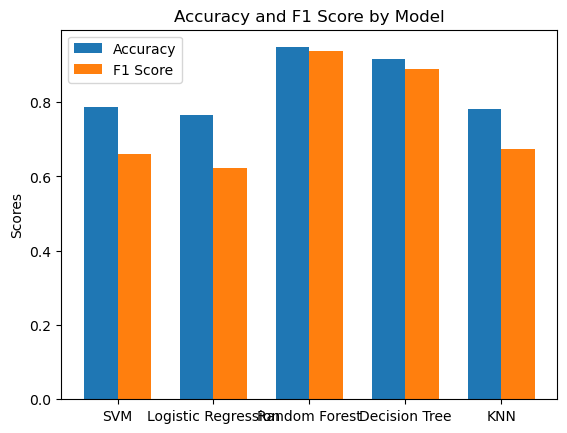

In [133]:
# 결과 출력
print("Cross-validation scores:")
for model, metrics in scores.items():
    print(f"{model}: Accuracy = {metrics['Accuracy']:.3f}, F1 Score = {metrics['F1 Score']:.3f}")

# 그래프로 표시
fig, ax = plt.subplots()
ind = np.arange(len(models))  # the x locations for the groups
width = 0.35  # the width of the bars

acc_bars = ax.bar(ind - width/2, [scores[name]['Accuracy'] for name in models], width, label='Accuracy')
f1_bars = ax.bar(ind + width/2, [scores[name]['F1 Score'] for name in models], width, label='F1 Score')

ax.set_ylabel('Scores')
ax.set_title('Accuracy and F1 Score by Model')
ax.set_xticks(ind)
ax.set_xticklabels(models.keys())
ax.legend()

plt.show()

In [ ]:
#########################

In [ ]:
# 2) 동일한 데이터로 딥러닝 분류 수행하라. (dense layer 만 사용)


Accuracy: 0.8571428656578064

In [ ]:
#########################

In [141]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.impute import KNNImputer

# 데이터 로드
url = "https://github.com/MyungKyuYi/AI-class/raw/main/diabetes.csv"
df = pd.read_csv(url)

# 0 값을 NaN으로 변환
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
df[cols] = df[cols].replace(0, np.nan)



# KNN Imputer 인스턴스 생성, k=5로 설정
imputer = KNNImputer(n_neighbors=5)
# 결측치 대체를 위해 KNN Imputer 적용
imputed_data = imputer.fit_transform(df)
# 대체된 데이터를 DataFrame으로 변환하고, 컬럼 이름 재지정
df = pd.DataFrame(imputed_data, columns=df.columns)


# 잡음을 추가할 특성 선택
features = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']]
# 잡음 추가
noise = np.random.normal(0, 0.1, features.shape)
augmented_features = features + noise
# 증강된 데이터 프레임 생성
augmented_data = df.copy()
augmented_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']] = augmented_features
# 원본 데이터와 증강된 데이터 결합
df = pd.concat([df, augmented_data])

# 특성과 레이블 분리
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 생성
model = Sequential([
    Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001, verbose=1)


C:\Users\Hyeon\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [142]:

# 모델 학습
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping, reduce_lr])


Epoch 1/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5733 - loss: 0.6960 - val_accuracy: 0.7468 - val_loss: 0.4967 - learning_rate: 0.0010
Epoch 2/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.7641 - loss: 0.4864 - val_accuracy: 0.7695 - val_loss: 0.4728 - learning_rate: 0.0010
Epoch 3/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7513 - loss: 0.4782 - val_accuracy: 0.7662 - val_loss: 0.4672 - learning_rate: 0.0010
Epoch 4/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.7997 - loss: 0.4311 - val_accuracy: 0.7662 - val_loss: 0.4621 - learning_rate: 0.0010
Epoch 5/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.7774 - loss: 0.4253 - val_accuracy: 0.7760 - val_loss: 0.4593 - learning_rate: 0.0010
Epoch 6/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.7891 - loss: 0.4185 - val_accuracy: 0.7565 - val_loss: 0.4604 - learning_rate: 0.0010
Epoch 7/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - accuracy: 0.8006 

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.8531 - loss: 0.3104 - val_accuracy: 0.8214 - val_loss: 0.3982 - learning_rate: 0.0010
Epoch 45/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.8716 - loss: 0.2953 - val_accuracy: 0.8084 - val_loss: 0.3987 - learning_rate: 0.0010
Epoch 46/100
 69/123 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.8802 - loss: 0.2884
Epoch 46: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.8798 - loss: 0.2902 - val_accuracy: 0.8084 - val_loss: 0.4025 - learning_rate: 0.0010
Epoch 47/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8822 - loss: 0.2865 - val_accuracy: 0.8214 - val_loss: 0.3936 - learning_rate: 5.0000e-04
Epoch 48/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8712 - loss: 0.2890 - val_accuracy: 0.8247 - val_loss: 0.3942 - learning_rate: 5.0000e-04
Epoch 49/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8865 - 

123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9167 - loss: 0.2240 - val_accuracy: 0.8604 - val_loss: 0.3678 - learning_rate: 2.5000e-04
Epoch 85/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.9286 - loss: 0.2265 - val_accuracy: 0.8571 - val_loss: 0.3676 - learning_rate: 2.5000e-04
Epoch 86/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.9097 - loss: 0.2235 - val_accuracy: 0.8571 - val_loss: 0.3668 - learning_rate: 2.5000e-04
Epoch 87/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9198 - loss: 0.2240 - val_accuracy: 0.8539 - val_loss: 0.3672 - learning_rate: 2.5000e-04
Epoch 88/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9286 - loss: 0.2204 - val_accuracy: 0.8571 - val_loss: 0.3662 - learning_rate: 2.5000e-04
Epoch 89/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - accuracy: 0.9068 - loss: 0.2440 - val_accuracy: 0.8571 - val_loss: 0.3672 - learning_rate: 2.5000e-04
Epoch 90/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - a

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.8402 - loss: 0.3979
Accuracy: 0.8571428656578064


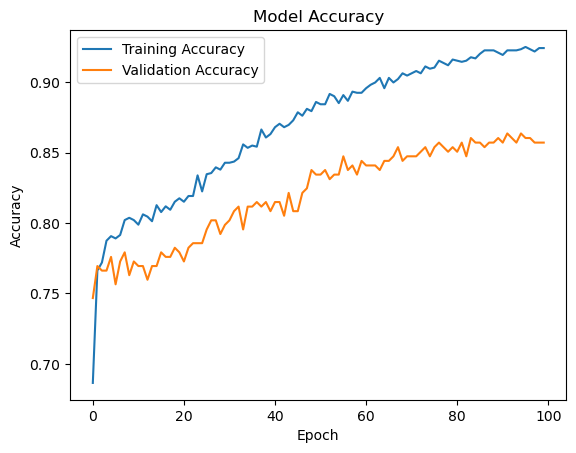

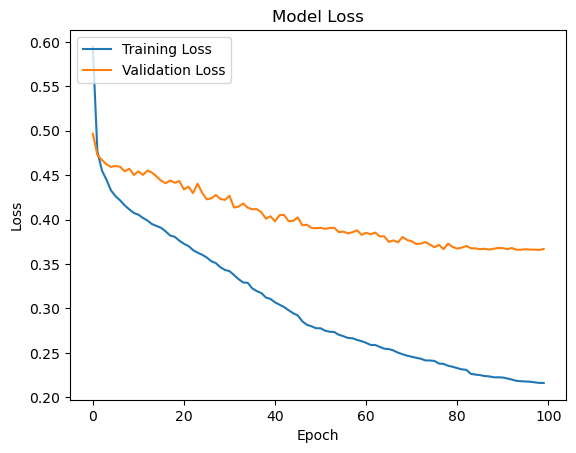

In [143]:
import matplotlib.pyplot as plt

# 모델 평가
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Accuracy:", accuracy)

# 학습 과정 시각화
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#########################

In [ ]:
# 3) 해당 데이터에서 Outcome을 삭제하고 BMI를 예측하는 회귀를 수행하라.

Training MSE: 1.390587200660611
Testing MSE: 8.197663036303632
Training R^2: 0.9714478506559548
Testing R^2: 0.8142201058518429

In [ ]:
#########################

In [127]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# 데이터 로드
url = "https://github.com/MyungKyuYi/AI-class/raw/main/diabetes.csv"
df = pd.read_csv(url)

# BMI가 0인 데이터 제거
df = df[df['BMI'] != 0]

# 0 값을 NaN으로 변환
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
df[cols] = df[cols].replace(0, np.nan)



# KNN Imputer 인스턴스 생성, k=5로 설정
imputer = KNNImputer(n_neighbors=5)
# 결측치 대체를 위해 KNN Imputer 적용
imputed_data = imputer.fit_transform(df)
# 대체된 데이터를 DataFrame으로 변환하고, 컬럼 이름 재지정
df = pd.DataFrame(imputed_data, columns=df.columns)


# 잡음을 추가할 특성 선택
features = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']]
# 잡음 추가
noise = np.random.normal(0, 0.1, features.shape)
augmented_features = features + noise
# 증강된 데이터 프레임 생성
augmented_data = df.copy()
augmented_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']] = augmented_features
# 원본 데이터와 증강된 데이터 결합
df = pd.concat([df, augmented_data])




# 'Outcome' 제거하고 'BMI'를 라벨로 설정, BMI를 반올림
df['BMI'] = df['BMI'].round()  # BMI 반올림 추가!
features = df.drop(columns=['Outcome', 'BMI'])
labels = df['BMI']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)




In [128]:
# 랜덤 포레스트 회귀 모델 훈련
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# 훈련 세트와 테스트 세트에 대한 예측
y_train_pred = random_forest_model.predict(X_train)
y_test_pred = random_forest_model.predict(X_test)

# 성능 메트릭 계산
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)



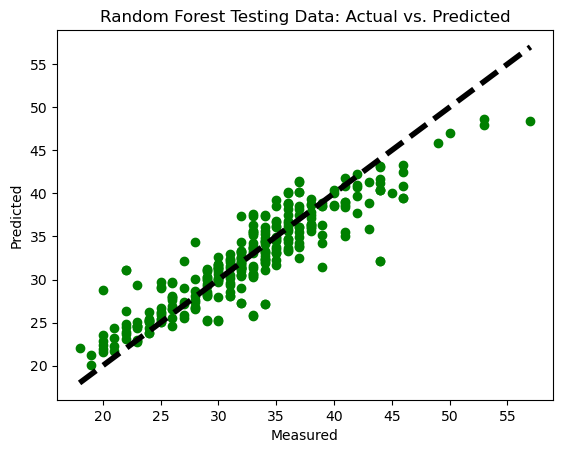

Training MSE: 1.390587200660611
Testing MSE: 8.197663036303632
Training R^2: 0.9714478506559548
Testing R^2: 0.8142201058518429


In [129]:
# 테스트 데이터에 대한 그래프 출력
plt.scatter(y_test, y_test_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Random Forest Testing Data: Actual vs. Predicted')
plt.show()

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training R^2:", train_r2)
print("Testing R^2:", test_r2)

In [ ]:
#########################

In [ ]:
# 4) 3번과 동일하지만 dense layer만 사용한 신경만으로 회귀를 수행하라.

XGBoost MSE: 5.790263350278038
XGBoost R^2: 0.8687779056615564

In [ ]:
#########################

In [178]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.impute import KNNImputer

# 데이터 로드
url = "https://github.com/MyungKyuYi/AI-class/raw/main/diabetes.csv"
df = pd.read_csv(url)

# BMI가 0인 데이터 제거
df = df[df['BMI'] != 0]

# 0 값을 NaN으로 변환
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']
df[cols] = df[cols].replace(0, np.nan)



# KNN Imputer 인스턴스 생성, k=5로 설정
imputer = KNNImputer(n_neighbors=5)
# 결측치 대체를 위해 KNN Imputer 적용
imputed_data = imputer.fit_transform(df)
# 대체된 데이터를 DataFrame으로 변환하고, 컬럼 이름 재지정
df = pd.DataFrame(imputed_data, columns=df.columns)


# 잡음을 추가할 특성 선택
features = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']]
# 잡음 추가
noise = np.random.normal(0, 0.1, features.shape)
augmented_features = features + noise
# 증강된 데이터 프레임 생성
augmented_data = df.copy()
augmented_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']] = augmented_features
# 원본 데이터와 증강된 데이터 결합
df = pd.concat([df, augmented_data])




# 'Outcome' 제거하고 'BMI'를 라벨로 설정, BMI를 반올림
df['BMI'] = df['BMI'].round()  # BMI 반올림 추가!
features = df.drop(columns=['Outcome', 'BMI'])
labels = df['BMI']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 생성
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001, verbose=1)


C:\Users\Hyeon\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [179]:
# 모델 학습
history = model.fit(X_train_scaled, y_train, epochs=100,  batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])


Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1080.9894 - val_loss: 738.9601 - learning_rate: 0.0010
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 544.7418 - val_loss: 128.3193 - learning_rate: 0.0010
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 94.2263 - val_loss: 81.3309 - learning_rate: 0.0010
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 70.2280 - val_loss: 69.0134 - learning_rate: 0.0010
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 65.4526 - val_loss: 64.2781 - learning_rate: 0.0010
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56.8748 - val_loss: 59.0062 - learning_rate: 0.0010
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 57.5268 - val_loss: 54.8509 - learning_rate: 0.0010
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52.0808 - val_loss: 51.3733 - learning_rate: 0.0010
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44.0018 - val_loss: 49.1910 - learning_rate: 0.0

Epoch 55/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.7820 - val_loss: 25.0170 - learning_rate: 2.5000e-04
Epoch 56/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.0555 - val_loss: 25.1756 - learning_rate: 2.5000e-04
Epoch 57/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.8463 - val_loss: 24.8245 - learning_rate: 2.5000e-04
Epoch 58/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.9387 - val_loss: 24.8921 - learning_rate: 2.5000e-04
Epoch 59/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.1341 - val_loss: 25.2158 - learning_rate: 2.5000e-04
Epoch 60/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17.9961 - val_loss: 24.8828 - learning_rate: 2.5000e-04
Epoch 61/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.3766 - val_loss: 24.7513 - learning_rate: 2.5000e-04
Epoch 62/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.7607 - val_loss: 24.7719 - learning_rate: 2.5000e-04
Epoch 63/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.1321 - va

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 18.8540
Test MSE: 19.099267959594727
Test R^2: 0.5671620430293589


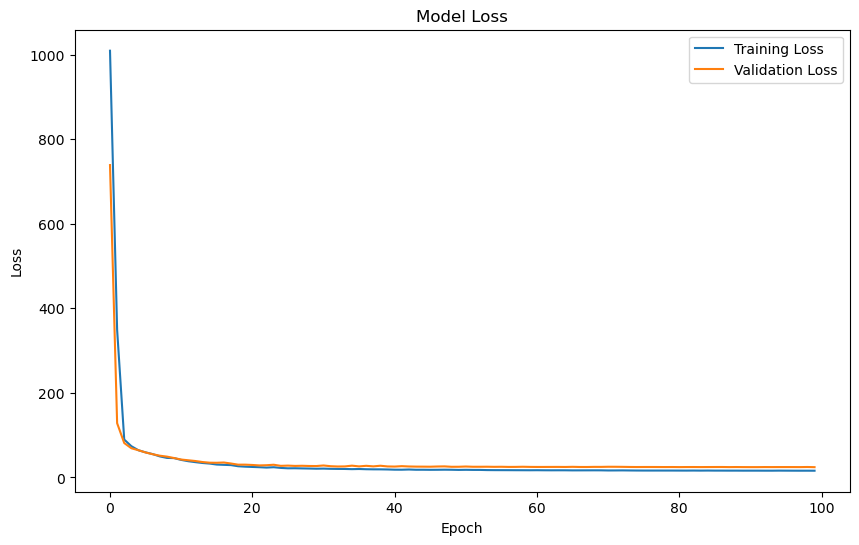

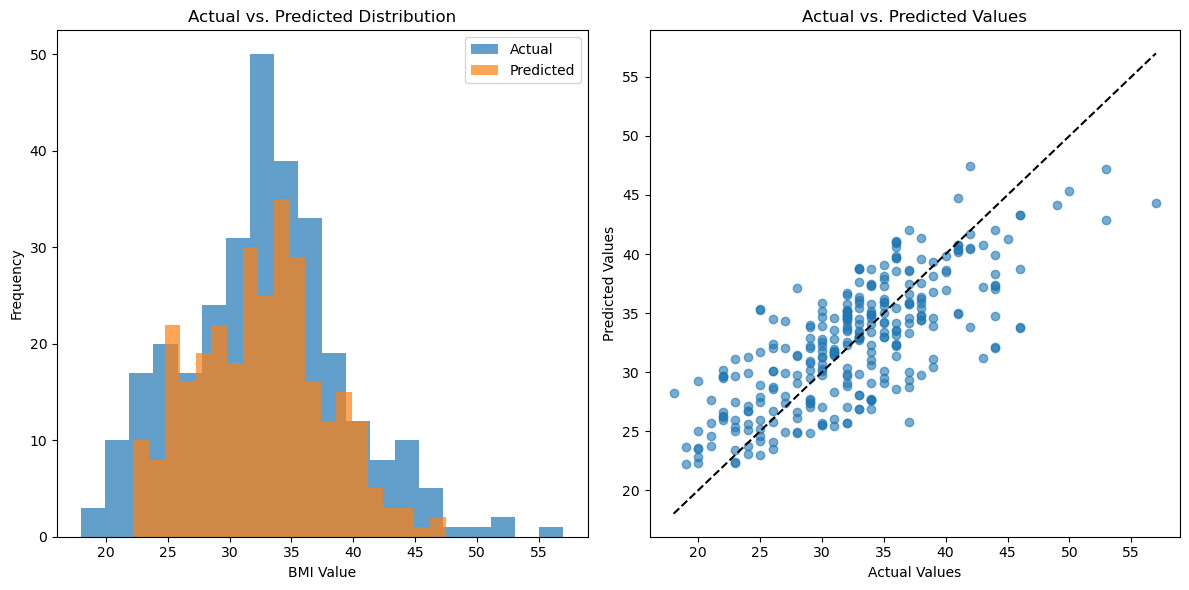

In [181]:
import matplotlib.pyplot as plt


# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test_scaled)

# MSE 계산
test_mse = model.evaluate(X_test_scaled, y_test)
print('Test MSE:', test_mse)

# R^2 스코어 계산
r2 = r2_score(y_test, y_pred)
print('Test R^2:', r2)

# 손실 시각화
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# 예측 값과 실제 값의 히스토그램
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(y_test, bins=20, alpha=0.7, label='Actual')
plt.hist(y_pred, bins=20, alpha=0.7, label='Predicted')
plt.xlabel('BMI Value')
plt.ylabel('Frequency')
plt.title('Actual vs. Predicted Distribution')
plt.legend()

# 실제 값 대비 예측 값의 산점도
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')  # 대각선 추가

plt.tight_layout()
plt.show()

In [ ]:
# 모델 성능의 한계라고 생각하여 최신 모델인 XGBRegressor을 사용

In [182]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# XGBoost 모델 생성
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                             max_depth = 5, alpha = 10, n_estimators = 200)

# 모델 훈련
xgb_model.fit(X_train_scaled, y_train)

# 예측 수행
y_pred_xgb = xgb_model.predict(X_test_scaled)

# 성능 평가
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MSE: {mse_xgb}")
print(f"XGBoost R^2: {r2_xgb}")

XGBoost MSE: 11.353564098083213
XGBoost R^2: 0.7426993611465527


In [ ]:
# 하이퍼파라미터 튜닝을 통해 최적의 하이퍼파라미터를 파악하였습니다.

In [183]:
from sklearn.model_selection import RandomizedSearchCV

# 파라미터 그리드 설정
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'alpha': [5, 10, 15]
}

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=100, scoring='neg_mean_squared_error', cv=3, verbose=1)

# 하이퍼파라미터 검색 실행
random_search.fit(X_train_scaled, y_train)

# 최적의 파라미터와 결과 출력
print("Best parameters:", random_search.best_params_)
print("Best score:", -random_search.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.15, 'colsample_bytree': 0.7, 'alpha': 5}
Best score: 12.5224215316428


In [ ]:
# 최종적으로 R2 87% 수준으로 모델을 훈련하였습니다.

In [184]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# XGBoost 모델 생성
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.15,
                             max_depth = 6, alpha = 5, n_estimators = 400)

# 모델 훈련
xgb_model.fit(X_train_scaled, y_train)

# 예측 수행
y_pred_xgb = xgb_model.predict(X_test_scaled)

# 성능 평가
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MSE: {mse_xgb}")
print(f"XGBoost R^2: {r2_xgb}")

XGBoost MSE: 5.790263350278038
XGBoost R^2: 0.8687779056615564
